Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.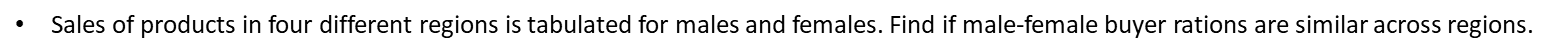

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BuyerRatio.csv")
df.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


Hypothesis Definition:
H0 = male-female buyer proportion is similar
Ha = male-female buyer proportion is different

In [27]:
df_table = df.iloc[:,1:5]
df_table
df_table.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [28]:
from scipy import stats as stats

In [29]:
test_stats = stats.chi2_contingency(df_table)
test_stats

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [30]:
rows = len(df_table.iloc[0:2,0])
columns = len(df_table.iloc[0,0:4])
dof = (rows-1)*(columns-1)
dof

3

In [31]:
expected_value = test_stats[3]
expected_value

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [32]:
from scipy.stats import chi2

In [33]:
chi_square = sum([(o-e)**2/e for o,e in zip(df_table.values, expected_value)])
chi_square_stats = chi_square[0]+chi_square[1]
chi_square_stats

1.5152956451130446

In [34]:
critical_value = chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [37]:
if chi_square_stats >= critical_value:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

do not reject null hypothesis


In [38]:
p_value = 1-chi2.cdf(chi_square_stats,3)
p_value

0.6787446296467897

In [39]:
if p_value <= 0.05:
    print("reject null hypothesis")
else:
    print("do not reject null hypothesis")

do not reject null hypothesis


Male female ratio is Independent